In [1]:
# Standard libraries
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier

# Append base directory
import os,sys,inspect
rootname = "chernysheva-tmaze-analysis-2020"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

# User libraries
from mesostat.stat.classification import binary_classifier
# from mesostat.stat.connectomics import offdiag_1D
from mesostat.utils.qt_helper import gui_fnames, gui_fpath
from mesostat.utils.pandas_helper import merge_df_from_dict
from mesostat.utils.arrays import numpy_merge_dimensions
from mesostat.utils.plotting import imshow

from src.lib.data_db import BehaviouralNeuronalDatabase
import src.lib.plots_lib as plots_lib
import src.lib.table_lib as table_lib
import src.lib.plots_pca as plots_pca
from src.lib.metric_wrapper import metric_by_selector
from src.lib.extra_metrics import num_non_zero_std, num_sample
from src.lib.stat_lib import test_quantity, rstest_twosided
from src.lib.significant_cells_lib import SignificantCells

%load_ext autoreload
%autoreload 2

Appended root directory /media/aleksejs/DataHDD/work/codes/comp-neuro/analysis-neuro/chernysheva-tmaze-analysis-2020


In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
#params['root_path_data']  = gui_fpath("Path to data files", "./")
# params['root_path_dff'] = '/media/alyosha/Data/TE_data/mariadata/dff/'
# params['root_path_deconv'] = '/media/alyosha/Data/TE_data/mariadata/deconv/'
params['root_path_dff'] = '/media/aleksejs/DataHDD/work/data/maria/dff/'
params['root_path_deconv'] = '/media/aleksejs/DataHDD/work/data/maria/deconv/'

In [3]:
dataDB = BehaviouralNeuronalDatabase(params)

In [4]:
dataDB.read_neuro_files()

IntProgress(value=0, description='Read DFF Data:', max=27)

IntProgress(value=0, description='Read DECONV Data:', max=27)

In [5]:
dataDB.read_behavior_files()

IntProgress(value=0, description='Read Neuro Data:', max=27)

No trials found for Trial_LWhole_Mistake skipping
No trials found for Trial_RWhole_Mistake skipping
No trials found for Trial_LWhole_Mistake skipping


# 4. Binary Classification

**Goal**: Train a classifier to discriminate between two cases (L/R), (C/M)

**Versions**:
* **4A. Mouse-wise**: Choose metric that is independent of number of samples, calc individually for each mouse
* **4B. All-mice**: Choose metric that has fixed shape per trial, calc for all mice

**Advantages**:
* Can theoretically make use of vector metrics, by studying their combinations

**Problems**:
* High overfitting. Performance for train and test dramatically different.

**TODO**:
* Research further into regularization. Try more sophisticated estimators (e.g. )
* Impl classification by phase

Doing mouse m060
(79, 440)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m061
(45, 230)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m065
(122, 415)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m066
(86, 235)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m067
(90, 245)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0


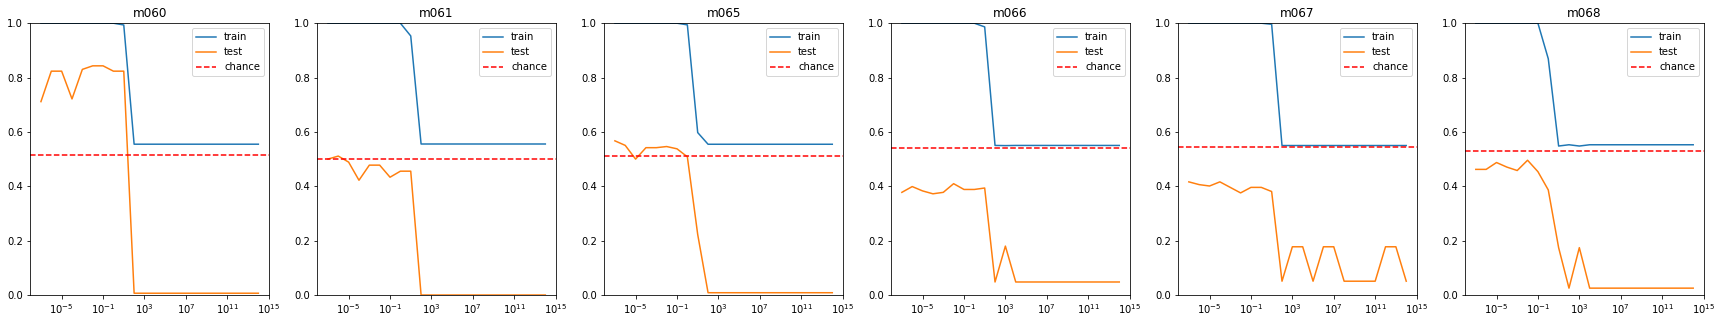

Doing mouse m060
(79, 440)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m061
(45, 230)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m065
(122, 415)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m066
(86, 235)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m067
(90, 245)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0


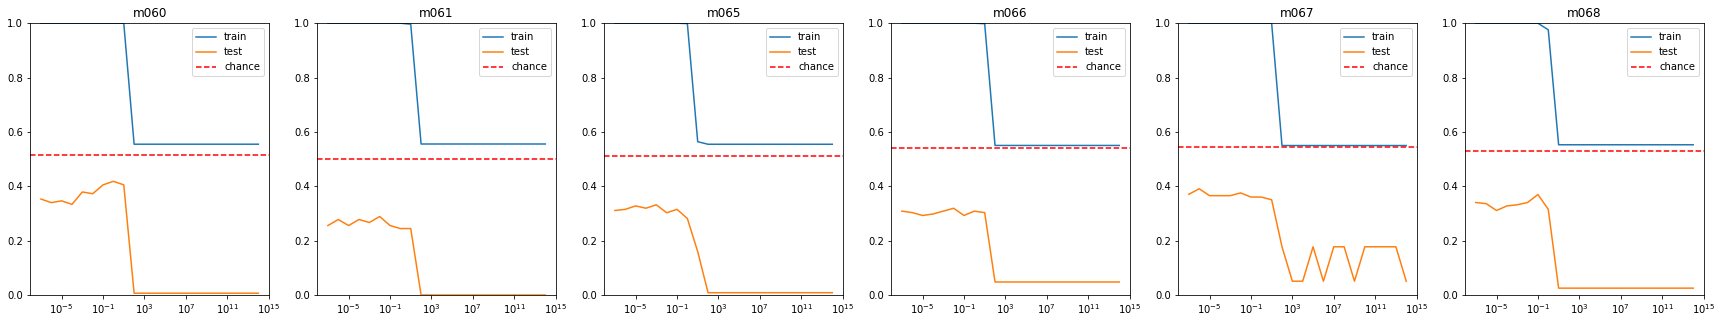

Doing mouse m060
(79, 440)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m061
(45, 230)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m065
(122, 415)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m066
(86, 235)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
1000000000.0
10000000000.0
100000000000.0
1000000000000.0
10000000000000.0
100000000000000.0
Doing mouse m067
(90, 245)
1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0


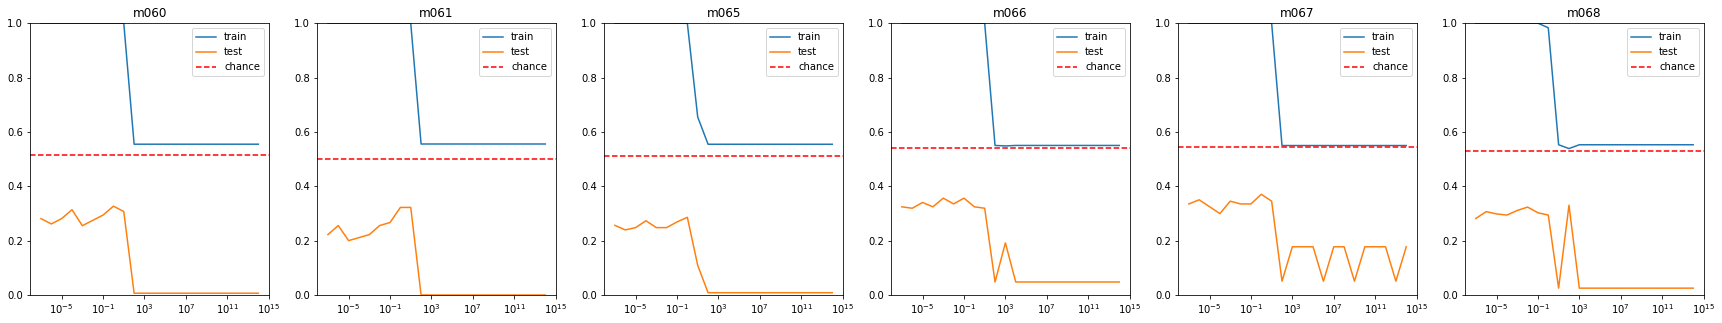

In [10]:
def cross_validate(dataDB, datatype, selector, metricName):
    CLst = 10.0**np.arange(-7, 15)

    nMice = len(dataDB.mice)
    fig, ax = plt.subplots(ncols=nMice, figsize=(5*nMice, 5))
    for iMouse, mousename in enumerate(sorted(dataDB.mice)):
        print('Doing mouse', mousename)

        queryDictL = {'datatype' : datatype, 'mousename' : mousename, 'direction' : 'L'}
        queryDictR = {'datatype' : datatype, 'mousename' : mousename, 'direction' : 'R'}

        dataL = metric_by_selector(dataDB, queryDictL, metricName, 'rp', selector, {})
        dataR = metric_by_selector(dataDB, queryDictR, metricName, 'rp', selector, {})
        
        dataL = numpy_merge_dimensions(dataL, 1, 3)
        dataR = numpy_merge_dimensions(dataR, 1, 3)
        
        print(dataL.shape)

        rezLst = []
        for C in CLst:
            print(C)
        #     classifier = LogisticRegression(max_iter=10000, C=C, penalty='l1', solver='liblinear')
#             classifier = LogisticRegression(max_iter=10000, C=C, solver='lbfgs')
#             classifier = RidgeClassifier(max_iter=10000, alpha=C)
            classifier = MLPClassifier(alpha=C, max_iter=10000, hidden_layer_sizes=(200, 50))
            rezLst += [binary_classifier(dataL, dataR, classifier, havePVal=True, method='kfold')]

        df = pd.DataFrame(rezLst)
#         display(df)

        ax[iMouse].set_title(mousename)
        ax[iMouse].semilogx(CLst, df['accTrain'], label='train')
        ax[iMouse].semilogx(CLst, df['accTest'], label='test')
        ax[iMouse].axhline(y=df['accNaive'][0], linestyle='--', color='r', label='chance')
        ax[iMouse].set_ylim([0,1])
        ax[iMouse].legend()
    plt.show()
    
for interval in [6,7,8]:
    cross_validate(dataDB, 'deconv', {'interval' : interval}, 'temporal_basis')

In [3]:
# 4B
queryDict = {"direction": "L", "datatype": "raw"}
#queryDict = {"performance": "Correct", "datatype": "raw"}
settings = {"serial": True, "metricSettings": None}
#settings = {"serial" : True, "metricSettings" : {"metric" : num_non_zero_std}}

rez = plots_lib.table_binary_classification(dataDB, "Maintenance", "performance", "cumul_ord_coeff", "",
                                            queryDict, settings)

rez

NameError: name 'plots_lib' is not defined

In [ ]:
# 4A
queryDict = {"performance": "Correct", "datatype": "raw"}
#queryDict = {"direction": "L", "datatype": "high"}
settings = {"serial": True, "metricSettings": {"lag" : 1, "max_lag" : 3}}
#settings = {"serial" : True, "metricSettings" : {"metric" : num_non_zero_std}}

plots_lib.table_binary_classification_bymouse(dataDB, "Maintenance", "direction", "temporal_basis", "rp",
                                              queryDict, settings)